### Building a Logistic Regression Classifier

In [1]:
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt

In [2]:
# input data
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [3]:
# initialize the logistic regression classifier
classifier = linear_model.LogisticRegression(solver='lbfgs', C=100)

# train the classifier
classifier.fit(X, y)

/home/hussam/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [4]:
# define ranges to plot the figure 
x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

# denotes the step size that will be used in the mesh grid
step_size = 0.01

# define the mesh grid
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# compute the classifier output
mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

# reshape the array
mesh_output = mesh_output.reshape(x_values.shape)

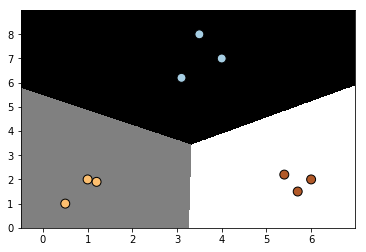

In [5]:
%matplotlib inline

# Plot the output using a colored plot 
plt.figure()

# choose a color scheme you can find all the options 
# here: http://matplotlib.org/examples/color/colormaps_reference.html
plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

# Overlay the training points on the plot 
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

# specify the boundaries of the figure
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())

# specify the ticks on the X and Y axes
plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

plt.show()

### Building a Naive Bayes Classifier

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 

In [7]:
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter02/data_multivar.txt'

X = []
y = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1]) 

X = np.array(X)
y = np.array(y)

In [8]:
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)

In [9]:
# compute accuracy of the classifier
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of the classifier =", round(accuracy, 2), "%")

Accuracy of the classifier = 99.5 %


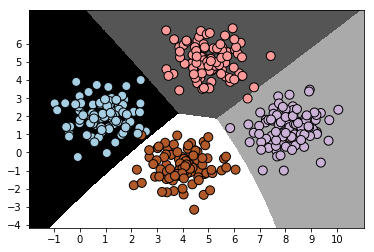

In [10]:
%matplotlib inline 

#plot a classifier

# define ranges to plot the figure 
x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

# denotes the step size that will be used in the mesh grid
step_size = 0.01

# define the mesh grid
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# compute the classifier output
mesh_output = classifier_gaussiannb.predict(np.c_[x_values.ravel(), y_values.ravel()])

# reshape the array
mesh_output = mesh_output.reshape(x_values.shape)

# Plot the output using a colored plot 
plt.figure()

# choose a color scheme
plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

# Overlay the training points on the plot 
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

# specify the boundaries of the figure
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())

# specify the ticks on the X and Y axes
plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

plt.show()

In [11]:
# Cross validation and scoring functions

from sklearn import model_selection


num_validations = 5
accuracy = model_selection.cross_val_score(classifier_gaussiannb, 
        X, y, scoring='accuracy', cv=num_validations)
print("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%")

f1 = model_selection.cross_val_score(classifier_gaussiannb, 
        X, y, scoring='f1_weighted', cv=num_validations)
print("F1: " + str(round(100*f1.mean(), 2)) + "%")

precision = model_selection.cross_val_score(classifier_gaussiannb, 
        X, y, scoring='precision_weighted', cv=num_validations)
print("Precision: " + str(round(100*precision.mean(), 2)) + "%")

recall = model_selection.cross_val_score(classifier_gaussiannb, 
        X, y, scoring='recall_weighted', cv=num_validations)
print("Recall: " + str(round(100*recall.mean(), 2)) + "%")

Accuracy: 99.5%
F1: 99.5%
Precision: 99.52%
Recall: 99.5%


### Confusion Matrix

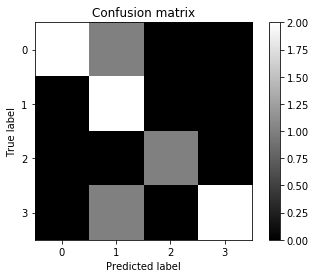

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline 
# Show confusion matrix
def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(4)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(confusion_mat)


### Performance Report

In [13]:
from sklearn.metrics import classification_report
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

   micro avg       0.78      0.78      0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



### Evaluating Cars Based on Their Characteristics

In [14]:
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [15]:
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter02/car.data.txt'

# Reading the data
X = []
y = []
count = 0
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = line[:-1].split(',')
        X.append(data)

X = np.array(X)

In [18]:
# Convert string data to numerical data
label_encoder = [] 
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    label_encoder.append(preprocessing.LabelEncoder())
    X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [23]:
# Build a Random Forest classifier
params = {'n_estimators': 200, 'max_depth': 8, 'random_state': 7}
classifier = RandomForestClassifier(**params)
classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [24]:
# Cross validation
from sklearn import model_selection

accuracy = model_selection.cross_val_score(classifier, 
        X, y, scoring='accuracy', cv=3)
print("Accuracy of the classifier: " + str(round(100*accuracy.mean(), 2)) + "%")

Accuracy of the classifier: 78.19%


In [30]:
# Testing encoding on single data instance
#input_data = ['vhigh', 'vhigh', '2', '2', 'small', 'low'] 
input_data = ['high', 'low', '2', 'more', 'med', 'high'] 

input_data_encoded = [-1] * len(input_data)
for i,item in enumerate(input_data):
#    input_data_encoded[i] = int(label_encoder[i].transform(input_data[i]))
     input_data_encoded[i] = int(label_encoder[i].transform([input_data[i]]))

input_data_encoded = np.array(input_data_encoded)


# Predict and print output for a particular datapoint
output_class = classifier.predict([input_data_encoded])
print("Output class:", label_encoder[-1].inverse_transform(output_class)[0])

Output class: acc


### Extracting Validation Curves

In [33]:
from sklearn.model_selection import validation_curve

classifier = RandomForestClassifier(max_depth=4, random_state=7)

parameter_grid = np.linspace(25, 200, 8).astype(int)
train_scores, validation_scores = validation_curve(classifier, X, y, 
        "n_estimators", parameter_grid, cv=5)
print("##### VALIDATION CURVES #####")
print("\nParam: n_estimators\nTraining scores:\n", train_scores)
print("\nParam: n_estimators\nValidation scores:\n", validation_scores)

##### VALIDATION CURVES #####

Param: n_estimators
Training scores:
 [[0.80680174 0.80824891 0.80752533 0.80463097 0.81358382]
 [0.79522431 0.80535456 0.81041968 0.8089725  0.81069364]
 [0.80101302 0.80680174 0.81114327 0.81476122 0.8150289 ]
 [0.8024602  0.80535456 0.81186686 0.80752533 0.80346821]
 [0.80028944 0.80463097 0.81114327 0.80824891 0.81069364]
 [0.80390738 0.80535456 0.81041968 0.80969609 0.81647399]
 [0.80390738 0.80463097 0.81114327 0.81476122 0.81719653]
 [0.80390738 0.80607815 0.81114327 0.81403763 0.81647399]]

Param: n_estimators
Validation scores:
 [[0.71098266 0.76589595 0.72543353 0.76300578 0.75290698]
 [0.71098266 0.75433526 0.71965318 0.75722543 0.74127907]
 [0.71098266 0.72254335 0.71965318 0.75722543 0.74418605]
 [0.71098266 0.71387283 0.71965318 0.75722543 0.72674419]
 [0.71098266 0.74277457 0.71965318 0.75722543 0.74127907]
 [0.71098266 0.74277457 0.71965318 0.75722543 0.74127907]
 [0.71098266 0.74566474 0.71965318 0.75722543 0.74418605]
 [0.71098266 0.7514

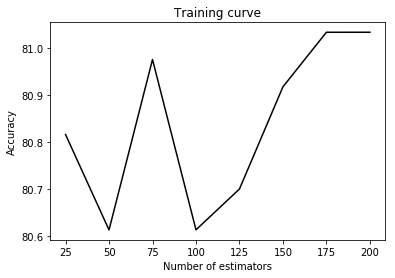

In [36]:
%matplotlib inline 

# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Training curve')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

In [37]:
classifier = RandomForestClassifier(n_estimators=20, random_state=7)
parameter_grid = np.linspace(2, 10, 5).astype(int)
train_scores, valid_scores = validation_curve(classifier, X, y, 
        "max_depth", parameter_grid, cv=5)
print("\nParam: max_depth\nTraining scores:\n", train_scores)
print("\nParam: max_depth\nValidation scores:\n", validation_scores)


Param: max_depth
Training scores:
 [[0.71852388 0.70043415 0.70043415 0.70043415 0.69942197]
 [0.80607815 0.80535456 0.80752533 0.79450072 0.81069364]
 [0.90665702 0.91027496 0.92836469 0.89797395 0.90679191]
 [0.97467438 0.96743849 0.96888567 0.97829233 0.96820809]
 [0.99421129 0.99710564 0.99782923 0.99855282 0.99277457]]

Param: max_depth
Validation scores:
 [[0.71098266 0.76589595 0.72543353 0.76300578 0.75290698]
 [0.71098266 0.75433526 0.71965318 0.75722543 0.74127907]
 [0.71098266 0.72254335 0.71965318 0.75722543 0.74418605]
 [0.71098266 0.71387283 0.71965318 0.75722543 0.72674419]
 [0.71098266 0.74277457 0.71965318 0.75722543 0.74127907]
 [0.71098266 0.74277457 0.71965318 0.75722543 0.74127907]
 [0.71098266 0.74566474 0.71965318 0.75722543 0.74418605]
 [0.71098266 0.75144509 0.71965318 0.75722543 0.74127907]]


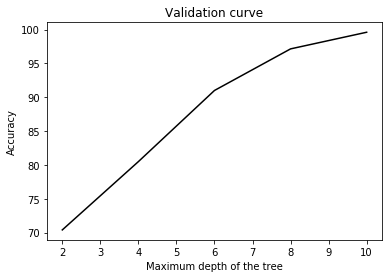

In [38]:
# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Validation curve')
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy')
plt.show()

### Estimating the Income Bracket

In [41]:
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB 

In [46]:
input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter02/adult.data.txt'

# Reading the data
X = []
y = []
count_lessthan50k = 0
count_morethan50k = 0
num_images_threshold = 30000
with open(input_file, 'r') as f:
    for line in f.readlines():
        if '?' in line:
            continue

        data = line[:-1].split(', ')

        if data[-1] == '<=50K' and count_lessthan50k < num_images_threshold:
            X.append(data)
            count_lessthan50k = count_lessthan50k + 1

        elif data[-1] == '>50K' and count_morethan50k < num_images_threshold:
            X.append(data)
            count_morethan50k = count_morethan50k + 1

        if count_lessthan50k >= num_images_threshold and count_morethan50k >= num_images_threshold:
            break

X = np.array(X)

In [49]:
# Convert string data to numerical data
label_encoder = [] 
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    if item.isdigit(): 
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [53]:
# Build a classifier
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
# Cross validation
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X_train, y_train)
y_test_pred = classifier_gaussiannb.predict(X_test)

# compute F1 score of the classifier
f1 = model_selection.cross_val_score(classifier_gaussiannb, 
        X, y, scoring='f1_weighted', cv=5)
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%")

F1 score: 75.9%


In [56]:
# Testing encoding on single data instance
input_data = ['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 
              'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States'] 
count = 0
input_data_encoded = [-1] * len(input_data)
for i, item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]]))
        count = count + 1 

input_data_encoded = np.array(input_data_encoded)

In [57]:
# Predict and print output for a particular datapoint
output_class = classifier_gaussiannb.predict([input_data_encoded])
print(label_encoder[-1].inverse_transform(output_class)[0])

<=50K


### Predicting the Quality of Wine

In [58]:
import numpy as np

input_file = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter02/wine.txt'

X = []
y = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[1:])
        y.append(data[0]) 

X = np.array(X)
y = np.array(y)

In [59]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)

In [61]:
from sklearn.tree import DecisionTreeClassifier

classifier_DecisionTree = DecisionTreeClassifier()
classifier_DecisionTree.fit(X_train, y_train)
y_test_pred = classifier_DecisionTree.predict(X_test)

# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the classifier =", round(accuracy, 2), "%")

Accuracy of the classifier = 91.11 %


In [62]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_test_pred)
print(confusion_mat)

[[17  2  0]
 [ 1 12  1]
 [ 0  0 12]]


### Newsgroup Trending Topics Classification

In [63]:
from sklearn.datasets import fetch_20newsgroups

NewsClass = ['rec.sport.baseball', 'rec.sport.hockey']

DataTrain = fetch_20newsgroups(subset='train',categories=NewsClass, shuffle=True, random_state=42)

print(DataTrain.target_names)

print(len(DataTrain.data))
print(len(DataTrain.target))

['rec.sport.baseball', 'rec.sport.hockey']
1197
1197


In [68]:
from sklearn.feature_extraction.text import CountVectorizer

CountVect = CountVectorizer()
XTrainCounts = CountVect.fit_transform(DataTrain.data)
print(XTrainCounts.shape)

(1197, 18571)


In [81]:
from sklearn.feature_extraction.text import TfidfTransformer

TfTransformer = TfidfTransformer(use_idf=False).fit(XTrainCounts)
XTrainNew = TfTransformer.transform(XTrainCounts)

TfidfTransformer = TfidfTransformer()
XTrainNewidf = TfidfTransformer.fit_transform(XTrainCounts)

In [83]:
from sklearn.naive_bayes import MultinomialNB
NBMultiClassifier = MultinomialNB().fit(XTrainNewidf, DataTrain.target)

NewsClassPred = NBMultiClassifier.predict(XTrainNewidf)

# compute accuracy of the classifier
accuracy = 100.0 * (DataTrain.target == NewsClassPred).sum() / XTrainNewidf.shape[0]
print("Accuracy of the classifier =", round(accuracy, 2), "%")

Accuracy of the classifier = 99.67 %
